In [1]:
import pandas as pd
import numpy as np
import statistics
from scipy.stats import skew, kurtosis, zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in data from gpa.csv
df = pd.read_csv('/Users/helenamabey/Downloads/gpa.csv')
# Used .head() to limit returns for ease of viewing
df.head()

,gpa,studyweek,sleepnight,out,gender
0,3.89,50,6.0,3.0,female
1,3.90,15,6.0,1.0,female
2,3.75,15,7.0,1.0,female
3,3.60,10,6.0,4.0,male
4,4.00,25,7.0,3.0,female


In [3]:
# Obtain statistical summary of the data frame
df.describe()

,gpa,studyweek,sleepnight,out
count,51.000000,51.000000,51.000000,51.000000
mean,3.612020,18.392157,7.098039,2.088235
std,0.327389,12.221421,1.048902,1.023259
min,2.900000,2.000000,5.000000,0.000000
25%,3.400000,10.000000,6.000000,1.000000
50%,3.650000,15.000000,7.000000,2.000000
75%,3.825000,25.000000,8.000000,3.000000
max,4.670000,50.000000,9.000000,4.000000


In [4]:
# Obtain data types and other relevent information from the date frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   gpa         51 non-null     float64
 1   studyweek   51 non-null     int64  
 2   sleepnight  51 non-null     float64
 3   out         51 non-null     float64
 4   gender      51 non-null     object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.1+ KB


#### Part 2, Question 1, 1) What type of variable is the “gender” variable? (Categorical or Numerical?)  

The variable 'gender' is a binary categorical data type. There are only two genders provided.

#### Part 2, Question 1, 2) For the “gender” variable, use the graphical EDA methods to visualize it. More importantly, please interpret all the visualizations in detail.

When looking for graphical EDA methods, I utilized ChatGPT for a detailed explanation of the term as well as best practices on when to use each type. When looking at categorical data, bar and pie charts are recommended because of the distinct comparisons. This works best for gender data as there were only two genders provided in the data set. Colors and palettes were found by searching all available options in ChatGPT. 

In reviewing both the bar and pie charts, it is clear that this dataset contains significantly more data points for females than for males. This imbalance should be considered when analyzing the data, as it may skew aggregate results. Given this discrepancy, it may be advisable to exclude gender-based analysis when examining the other characteristics in the dataset to assure a balanced interpretation. It is valuable to document this imbalance given we do not have information of the larger population. The population may be skewed in a similar fashion so it may have merit to conduct gender-based analysis. At that point, gender-based analysis could be reviewed, keeping in mind the underlying imbalance. 

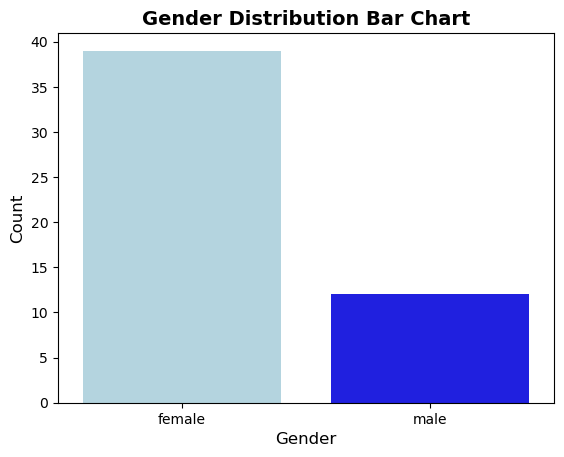

In [7]:
# Bar Chart of Gender distribution
gender_counts = df["gender"].value_counts()
colors = {'male': 'blue', 'female': 'lightblue'}
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette=colors)
plt.title("Gender Distribution Bar Chart", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

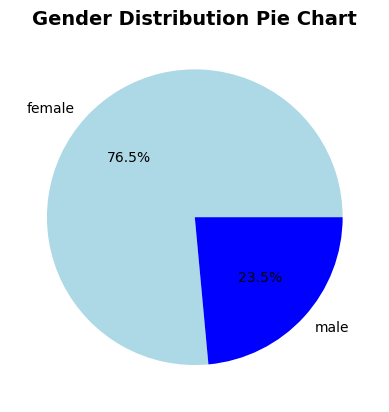

In [8]:
# Pie chart of Gender distribution
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["lightblue", "blue"])
plt.title("Gender Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()

#### Part 2, question 1, 3) What type of variable is the “studyweek” variable? (Categorical or Numerical?)  

The variable studyweek is a discrete numerical data type. 

---

#### Part 2, question 1, 4) Generate a non-graphical EDA (descriptive summary statistics) for the “studyweek” variable. More importantly, please interpret the results in detail.  

I found the code for creating non-graphical EDA using the .agg function using ChatGPT and updating it for this data set. I reviewed the definition of .value_counts to capture the frequency of each data point. Skewness and kutosis code was located through ChatGPT and using Stack Overflow boards for examples. I added graphical EDA to assist in analyzing the results of the non-graphical EDA. 

The summary statistics provide insight into the behavior of the dataset with regard to the studyweek data point. They offer basic information such as the count of data points and the minimum and maximum values. Having both the median and mean values give an opportunity to review the dataset for potential outliers. Because the mean is considerably higher than the median, it appears that the data contains high-value outliers that are skewing the mean. Based on what we learned about skewness, it is clear that this dataset is right-skewed, with more data points in the lower range. This is supported by the 25%, 50%, and 75% quartiles, which confirm that all but one data point fall within this range.

Using code I located through ChatGPT, I calculated frequency distributions but found it difficult to identify a clear pattern in the large list of results. I searched ChatGPT to find a method to bin this data to assist in analysis. Using the sample code provided, revising it for this dataset, I found that it validated the right-skewed distribution, showing a few extreme high outlier values.

As a secondary validation, I created graphical EDA visualizations. The histogram and box plot confirmed the interpretations found using the non-graphical EDA (summary statistics).

In [10]:
# Provides descriptive summary statistics for the studyweek variable
summary_stats = df["studyweek"].agg(["count", "min", "max", "mean", "median", "std", "var"])
print(summary_stats)

count      51.000000
min         2.000000
max        50.000000
mean       18.392157
median     15.000000
std        12.221421
var       149.363137
Name: studyweek, dtype: float64


In [11]:
# Using basic describe function
df["studyweek"].describe()

count    51.000000
mean     18.392157
std      12.221421
min       2.000000
25%      10.000000
50%      15.000000
75%      25.000000
max      50.000000
Name: studyweek, dtype: float64

In [12]:
# Gives the median not included in .describe()
df["studyweek"].median()

15.0

In [13]:
# Frequency percentages
print(df["studyweek"].value_counts(normalize=True) * 100)

studyweek
10    13.725490
15     9.803922
25     7.843137
12     7.843137
30     7.843137
4      5.882353
20     5.882353
42     3.921569
40     3.921569
6      3.921569
8      3.921569
14     3.921569
18     1.960784
28     1.960784
11     1.960784
3      1.960784
50     1.960784
45     1.960784
35     1.960784
13     1.960784
21     1.960784
2      1.960784
7      1.960784
Name: proportion, dtype: float64


In [14]:
# Sample code provided by ChatGPT for creating bins. Alternative option is .qcut() which divides into even bins. For this dataset, it
# was more useful in analysis to create structured bins
df['studyweek_bins'] = pd.cut(df['studyweek'], bins=[0, 10, 20, 30, 40, 50], labels=["0-10", "11-20", "21-30", "31-40", "41-50"])

In [15]:
# Adding .sort_index() retains the categorical bin order (ChatGPT)
df['studyweek_bins'].value_counts(normalize=True).sort_index() * 100

studyweek_bins
0-10     33.333333
11-20    33.333333
21-30    19.607843
31-40     5.882353
41-50     7.843137
Name: proportion, dtype: float64

In [16]:
# Skewness
df["studyweek"].skew()

0.9029861515697643

In [17]:
#Kurtosis
df["studyweek"].kurt()

-0.042562109186964125

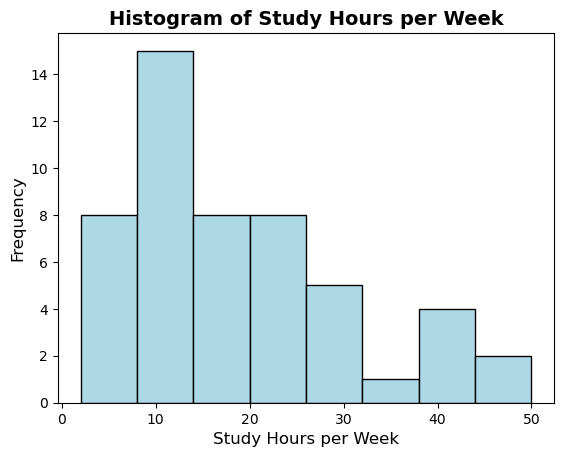

In [18]:
#Histogram for studyweek
df['studyweek'].plot(kind='hist', bins=8, color='lightblue', edgecolor='black')
plt.title('Histogram of Study Hours per Week', fontsize=14, fontweight='bold')
plt.xlabel("Study Hours per Week", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

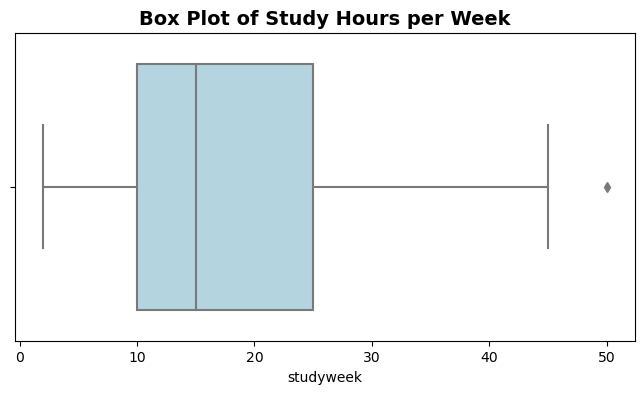

In [19]:
# Box Plot for studyweek
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["studyweek"], color="lightblue")
plt.title("Box Plot of Study Hours per Week", fontsize=14, fontweight='bold')
plt.show()

#### Part 2, question 1 5) What type of variable is the “gpa” variable? (Categorical or Numerical?)  

The variable gpa is an example of a continuous numerical data type. It is not categorical and it represents a measurable value. 

---

#### Part 2, question 1 6) Generate a non-graphical EDA (descriptive statistics) for the “gpa” variable. More importantly, please interpret the results in detail.  

In a review of the summary statistics, it is shown that the mean and median are very similar. This would show that the data is nearly normally distributed. This is also shown with a very low standard deviation, meaning nearly every value is similar to the mean. The variance is also very low, showing that nearly all the values are clustered together.

---

#### Part 2, question 1 7) Generate all graphical EDA methods to visualize the “gpa” variable. More importantly, please interpret the results in detail.

Using a histogram provides a visual representation of the distribution of GPAs overall. The GPA distribution is nearly normal and contains one outlier with a higher GPA than the majority of the data pushing a very slight right-skew. Using a box plot for GPA data strongly confirms the left-skew of the results. It also shows the lone outlier with a GPA of 4.67 is considerably higher than the results found within the interquartile range. Both graphs confirm what we saw in the non-graphical EDA. The distribution is nearly normal, with a small right-skew due to the outlier. The box plot shows the very low variance as well. Nearly all of the values are within the IQR and clustered together. 

In [21]:
# Using basic describe function
df["gpa"].describe()

count    51.000000
mean      3.612020
std       0.327389
min       2.900000
25%       3.400000
50%       3.650000
75%       3.825000
max       4.670000
Name: gpa, dtype: float64

In [22]:
# Gives the median not included in .describe()
df["gpa"].median()

3.65

In [23]:
# Provides descriptive summary statistics for gpa variable
summary_stats = df["gpa"].agg(["count", "min", "max", "mean", "median", "std", "var"])
print(summary_stats)

count     51.000000
min        2.900000
max        4.670000
mean       3.612020
median     3.650000
std        0.327389
var        0.107184
Name: gpa, dtype: float64


In [24]:
# Frequency percentages
print(df["gpa"].value_counts(normalize=True) * 100)

gpa
3.700    9.803922
3.500    7.843137
3.400    7.843137
3.925    5.882353
3.100    5.882353
4.000    5.882353
3.600    5.882353
3.750    5.882353
3.150    3.921569
3.825    3.921569
3.650    3.921569
3.900    3.921569
3.800    3.921569
3.980    1.960784
3.000    1.960784
3.200    1.960784
3.360    1.960784
3.425    1.960784
3.890    1.960784
3.850    1.960784
3.575    1.960784
4.670    1.960784
2.900    1.960784
3.428    1.960784
3.250    1.960784
3.810    1.960784
Name: proportion, dtype: float64


In [25]:
# Sample code provided by ChatGPT for creating bins. Used this as an alternative to .cut() used for studyweek data

df['gpa_bins'] = pd.qcut(df['gpa'], q=3, labels=["Low", "Medium", "High"])

In [26]:
# Adding .sort_index() retains the categorical bin order (ChatGPT)
df['gpa_bins'].value_counts(normalize=True).sort_index() * 100

gpa_bins
Low       39.215686
Medium    27.450980
High      33.333333
Name: proportion, dtype: float64

In [27]:
# Skewness
df["gpa"].skew()

0.15161530754009853

In [28]:
# Kurtosis
df["gpa"].kurt()

1.043749360599317

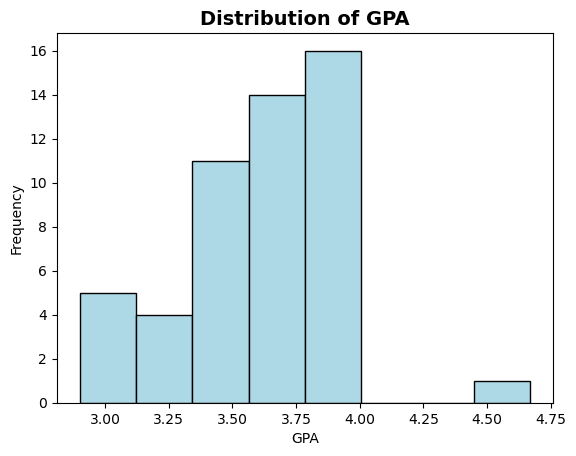

In [29]:
#Histogram for gpa
df['gpa'].plot(kind='hist', bins=8, color='lightblue', edgecolor='black')
plt.title('Distribution of GPA', fontsize=14, fontweight='bold')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

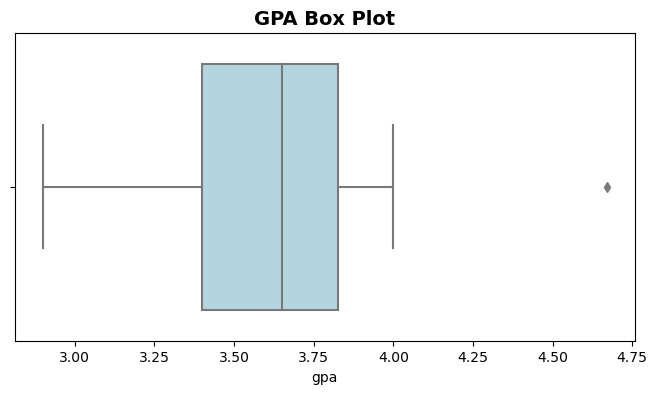

In [30]:
# Box Plot for GPA
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["gpa"], color="lightblue")
plt.title("GPA Box Plot", fontsize=14, fontweight='bold')
plt.show()

#### Part 2, question 1 8) Assess the relationship between gpa and studyweek including all non-graphical and graphical EDA methods. Are these varibles strongly or weakly correlated/related? Is the correlation postive or negative? 

To evaluate the relationship between GPA and Study Hours per Week, I utilized a scatterplot. At first glance, a linear relationship did not seem clear. Using what we learned about correlation, I researched a Pandas code snippet to calculate correlation. A basic example was found on W3Schools, and I was able to pull in just the values being analyzed by column (ChatGPT). A correlation value of 0.0858 confirms that there is little to no linear relationship between these two variables. This relationship is neither positive or negative.

In [32]:
# Using basic describe function
# Need details
df[['gpa','studyweek']].describe()

,gpa,studyweek
count,51.000000,51.000000
mean,3.612020,18.392157
std,0.327389,12.221421
min,2.900000,2.000000
25%,3.400000,10.000000
50%,3.650000,15.000000
75%,3.825000,25.000000
max,4.670000,50.000000


In [33]:
# Provides descriptive summary statistics for gpa and studyweek variables
summary_stats = df[["gpa", "studyweek"]].agg(["count", "min", "max", "mean", "median", "std", "var"])
print(summary_stats)

              gpa   studyweek
count   51.000000   51.000000
min      2.900000    2.000000
max      4.670000   50.000000
mean     3.612020   18.392157
median   3.650000   15.000000
std      0.327389   12.221421
var      0.107184  149.363137


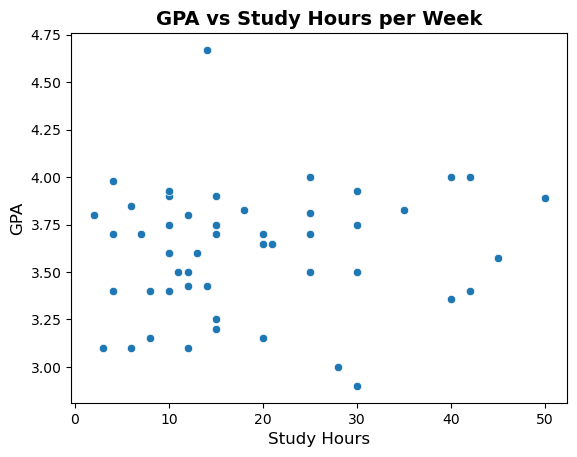

In [34]:
#Scatterplot studyweek vs gpa
sns.scatterplot(x=df['studyweek'], y=df['gpa'])
plt.title('GPA vs Study Hours per Week', fontsize=14, fontweight='bold')
plt.xlabel("Study Hours", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.show()

In [35]:
df[['gpa', 'studyweek']].corr()

,gpa,studyweek
gpa,1.000000,0.085783
studyweek,0.085783,1.000000


#### Part 2, Question 1, 9) Assess the relationship between the “gender” and “gpa” variables by generating all non-graphical and graphical EDA methods that you learned. Do you think variation in gpa can be explained by the gender of the student for this data set? Do you think these two variables are strongly or weakly related? Please explain.  

For this comparison, I first obtained aggregate data on both of the value sets. On the surface, the mean and median of the sets were similar when divided by gender. Remembering that the number of male and female values were not evenly distributed, I wanted to research how this would impact the results of this analysis. I researched ways to validate relationships when the sample values are not evenly distributed. By completing an internet search, I was able to locate a test for this situation called the Mann-Whitney U Test. ChatGPT was able to provide a sample code snippet in Python including the correct SciPy library to import to run this test. Being unfamiliar with this test, I again used ChatGPT to assist in analyzing the results of the test. Based on the outcome, it is very unlikely that gender impacts GPA based on this sample set. It suggests that any variance may be based just on 'random chance' other than any real correlation. 

In [37]:
# Using basic describe function
df['gpa'].describe()

count    51.000000
mean      3.612020
std       0.327389
min       2.900000
25%       3.400000
50%       3.650000
75%       3.825000
max       4.670000
Name: gpa, dtype: float64

In [38]:
df['gender'].value_counts()

gender
female    39
male      12
Name: count, dtype: int64

In [91]:
## I located this method to compare two variables non-graphically. It provides GPA aggregates by gender. This gives a clear comparison 
## without using a visualization
df.groupby('gender')['gpa'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,39.0,3.628026,0.297292,2.9,3.4125,3.7,3.87,4.00
male,12.0,3.560000,0.421922,3.1,3.3375,3.5,3.70,4.67


In [40]:
df.groupby('gender')['gpa'].median()

gender
female    3.7
male      3.5
Name: gpa, dtype: float64

In [41]:
# Mann-Whitney U Test for datasets not normally distributed
from scipy.stats import mannwhitneyu

male_gpa = df[df['gender'] == 'male']['gpa']
female_gpa = df[df['gender'] == 'female']['gpa']
mannwhitneyu(male_gpa, female_gpa)


MannwhitneyuResult(statistic=172.0, pvalue=0.17141595743500193)

#### Box Plot Gender vs GPA

This chart shows that distribution of GPAs is very similar regardless of gender. There is a single outlier in the male gender value but, if that were to be excluded, the results would nearly be identical for both values. 

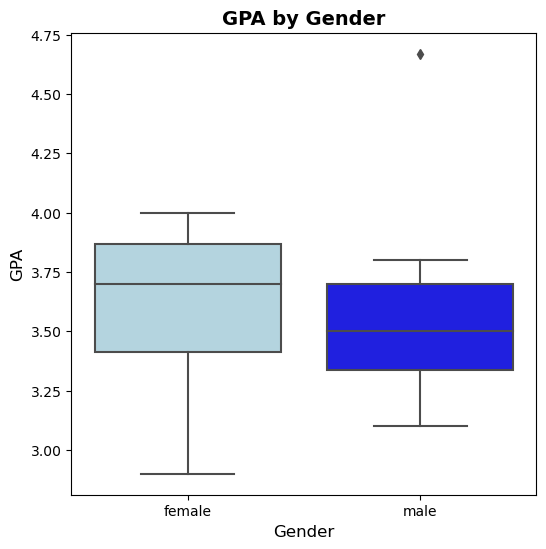

In [43]:
# Box Plot Gender vs GPA
plt.figure(figsize=(6, 6))
sns.boxplot(x=df['gender'], y=df['gpa'], palette={'male': 'blue', 'female': 'lightblue'})
plt.title('GPA by Gender', fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.show()

#### Scatterplot Gender vs GPA

This option does not work because it is comparing categorical and numerical data. It doesn't provide a comparison, moreso just a list of the results for each value in gender.

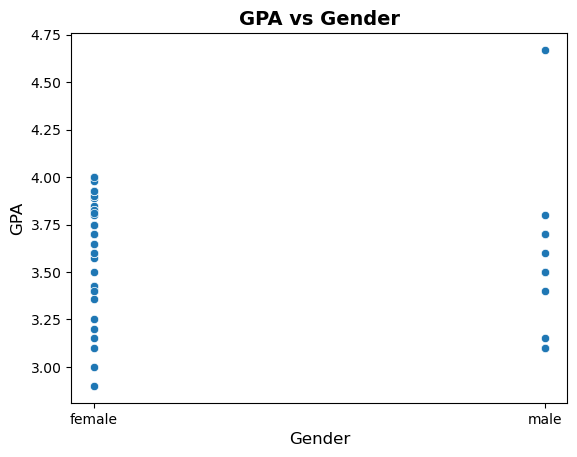

In [45]:
# Scatterplot Gender vs GPA
sns.scatterplot(x=df['gender'], y=df['gpa'])
plt.title('GPA vs Gender',fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.show()

#### Swarm Plot Gender vs GPA

This visualization is able to compare categorical and numerical data. It prevents overlap and does provide a clear interpretation of the distribution. A swarm plot was a recommendation when asking ChatGPT for the best types of visualizations when comparing categorical and numerical data once I determined that a scatterplot would not work.

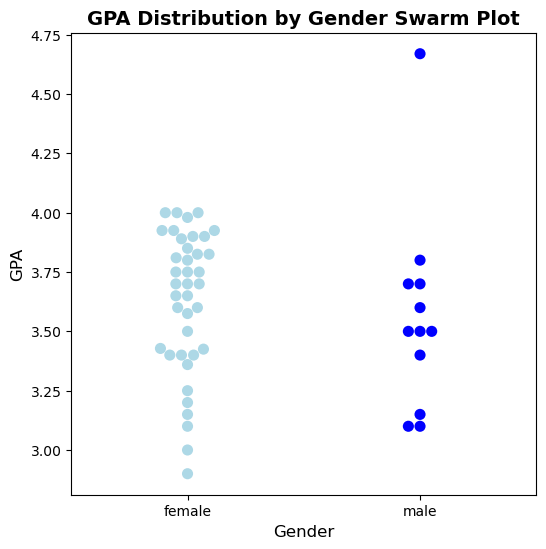

In [47]:
# Swarm Plot gender vs gpa 
plt.figure(figsize=(6, 6))
sns.swarmplot(x=df['gender'], y=df['gpa'], palette={'male': 'blue', 'female': 'lightblue'}, size=8)
plt.title("GPA Distribution by Gender Swarm Plot", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.show()

#### Violin and Swarm Plot Gender vs GPA

I used ChatGPT to determine if there was a way to overlay two visualization types to add to clarity. A violin and swarm type combination was suggested. I utilized the sample code provided and updated it for this dataset. 

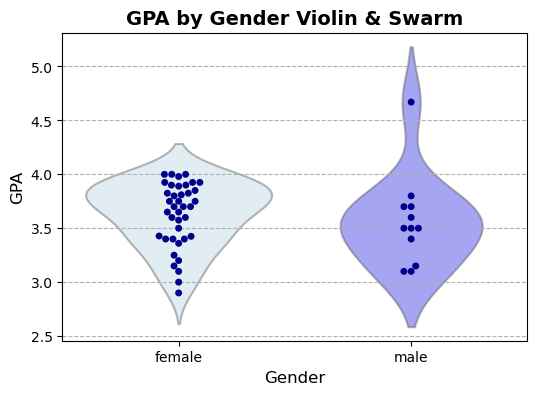

In [49]:
plt.figure(figsize=(6, 4))
violin = sns.violinplot(x=df['gender'], y=df['gpa'], inner=None, palette={'male': 'blue', 'female': 'lightblue'})

# Adjust transparency manually (ChatGPT)
for artist in violin.collections:
    artist.set_alpha(0.4)  # Adjust transparency level
    
sns.swarmplot(x=df['gender'], y=df['gpa'], color='darkblue', size=5)
plt.title("GPA by Gender Violin & Swarm", fontsize=14, fontweight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("GPA", fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()


#### AI Statement

I utilized multiple sources online to assist in understanding definitions and for the use of appropriate Python coding. I cited references to ChatGPT as they were used and the purpose for which they were used within or before the cell where the information was used. For Python visualizations, I utilized ChatGPT for formatting and styling syntax for table characteristics such as color/palette, font size, figure size, font bolding, transparency, and marker size. Outside of ChatGPT, I utilized webpage resources including Wikipedia for basic definitions and both W3 Schools and Stack Overflow forums for suggestions on syntax and coding assistance.